In [1]:
import torch
import matplotlib.pyplot as plt
import ESN
import time
import numpy as np
torch.set_default_device("cuda:0")
torch.set_default_dtype(torch.double)
# Parameters
Two,Ttrain = 2000,10000
N = 400
C = 0.95
dim = 4
maxtau = int(N)

taus = np.arange(1,maxtau)

torch.manual_seed(0)
#torch.manual_seed(111)

u_asym = torch.rand(dim, Two + Ttrain)
#u_sym = u_asym
u_sym = 2 * u_asym - 1

esn = ESN.ESN_mult(N, uC=C, dim=dim)

st = time.time()
Xwo = esn.run_washout(u_sym, Two, actf="identity")
print("runtime :",time.time()-st)

st = time.time()
#mfs = ESN.MCwithPI_general(u_sym, Xwo, maxtau)
#mfs = ESN.MCwithPI_general_newsur(u_sym, Xwo, maxtau,sur_sets=1)
#mfs = ESN.MC_cSVD_old(u_sym, Xwo, maxtau)
#mfs,sur_val = ESN.MC_cSVD(u_sym, Xwo, maxtau,ret_sur=True)

#mfs1,raw_res,sur_val = ESN.MC_cSVD(u_sym, Xwo, maxtau,raw_mfs=True,rev_method=False)
raw_res, lin, rev,sur_val =ESN.MC_cSVD(u_sym, Xwo, maxtau,ret_all=True)
mfs3 = (raw_res - sur_val.unsqueeze(1))/(1-sur_val.unsqueeze(1))

mfs1 = lin
mfs2 = rev
print("calc time :",time.time()-st)


#st = time.time()
#mfs = ESN.MCwithPI_general(u_sym, Xwo, maxtau)
#mfs = ESN.MCwithPI_general_with_surrogate(u_sym, Xwo, maxtau,sur_samples=10)
#mfs = ESN.MCwithPI_general_newsur(u_sym, Xwo, maxtau,sur_sets=1)
#mfs = ESN.MC_cSVD_old(u_sym, Xwo, maxtau)
#mfs2 = ESN.MC_cSVD(u_sym, Xwo, maxtau)
#print("calc time :",time.time()-st)
#mfs3 = ESN.MC_cSVD(u_sym, Xwo, maxtau)

totMC1 = torch.sum(mfs1).cpu().numpy()
totMC2 = torch.sum(mfs2).cpu().numpy()
#totMC3 = torch.sum(mfs3).cpu().numpy()

#colors = ["r", "g", "b", "c", "m", "y","pink","lime"]
print(f"totMC1:{totMC1}\ntotMC2:{totMC2}\nsurrogate value: {sur_val.cpu().numpy()}")
#print(totMC3)
#print(f"totMC:{totMC}")

runtime : 0.5613431930541992
calc time : 0.3350555896759033
totMC1:401.17559298962897
totMC2:399.2486286660641
surrogate value: [0.03999117 0.0400819  0.04036801 0.04006595]
399.4752070997444


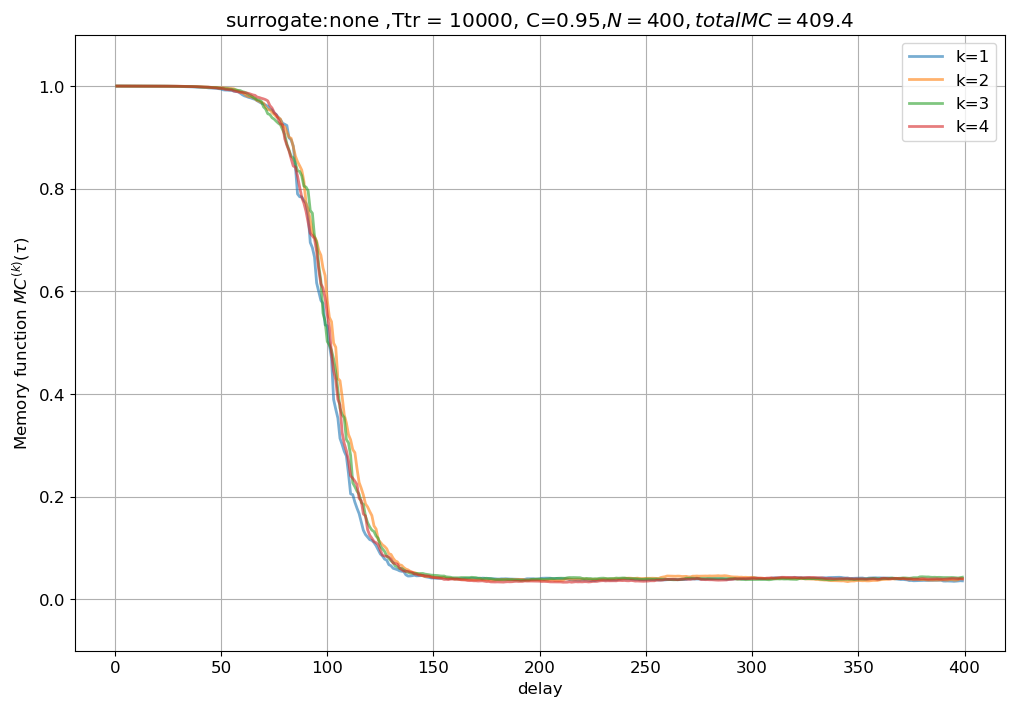

In [16]:
### Raw data plot

fig,ax = plt.subplots(figsize=(12,8))
for d in range(dim):
    #plt.plot(taus,mfs[d].cpu().numpy(),color=colors[d],alpha=0.6,label="dim "+str(d))
    plt.plot(taus,raw_res[d].cpu().numpy(),alpha=0.6,label="k="+str(d+1),linewidth=2)

totrawMC = torch.sum(raw_res[:,:tau_end]).cpu().numpy()
plt.ylim(-0.1,1.1)
plt.xlabel("delay")
plt.ylabel(r'Memory function $MC^{(k)}(\tau)$')
plt.title(r'surrogate:%s ,Ttr = %d, C=%.2f,$N=%d, totalMC=%.1f$'%("none",Ttrain,C,N,totrawMC))
plt.legend()
plt.grid(True)
plt.savefig(f"./experiments/surrogate/raw_{dim}d_{Ttrain}T_{N}N.png")

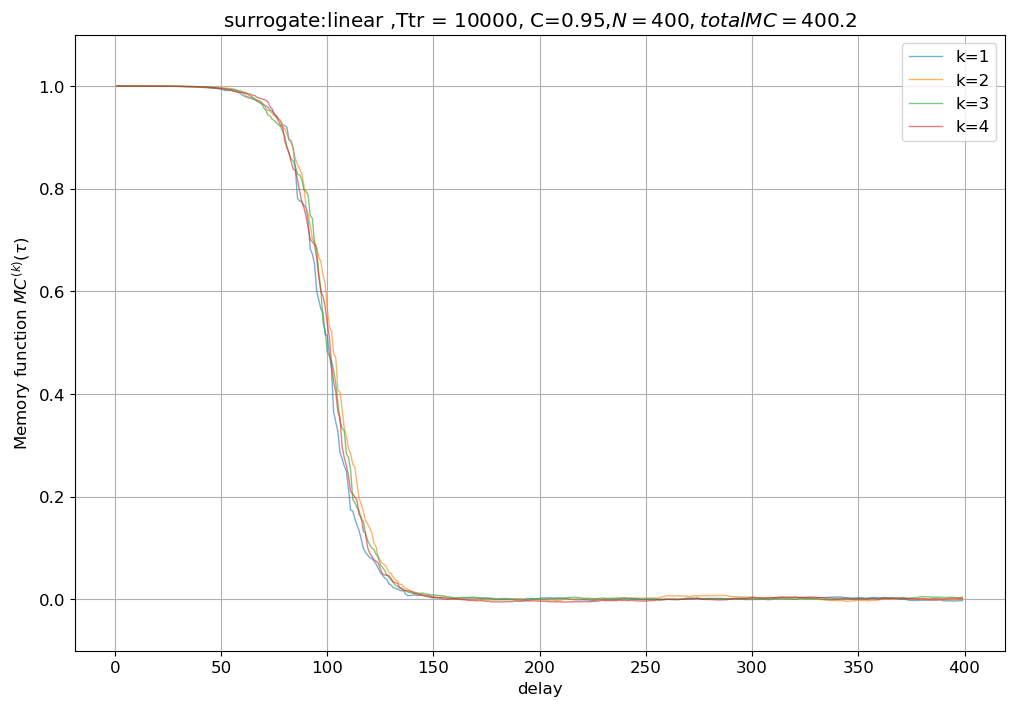

In [18]:
### lin method data plot

fig,ax = plt.subplots(figsize=(12,8))
for d in range(dim):
    #plt.plot(taus,mfs[d].cpu().numpy(),color=colors[d],alpha=0.6,label="dim "+str(d))
    plt.plot(taus,mfs1[d].cpu().numpy(),alpha=0.6,label="k="+str(d+1),linewidth=1)

totMC = torch.sum(mfs1[:,:tau_end]).cpu().numpy()
plt.ylim(-0.1,1.1)
plt.xlabel("delay")
plt.ylabel(r'Memory function $MC^{(k)}(\tau)$')
plt.title(r'surrogate:%s ,Ttr = %d, C=%.2f,$N=%d, totalMC=%.1f$'%("linear",Ttrain,C,N,totMC))
plt.legend()
plt.grid(True)
plt.savefig(f"./experiments/surrogate/lin_{dim}d_{Ttrain}T_{N}N.png")

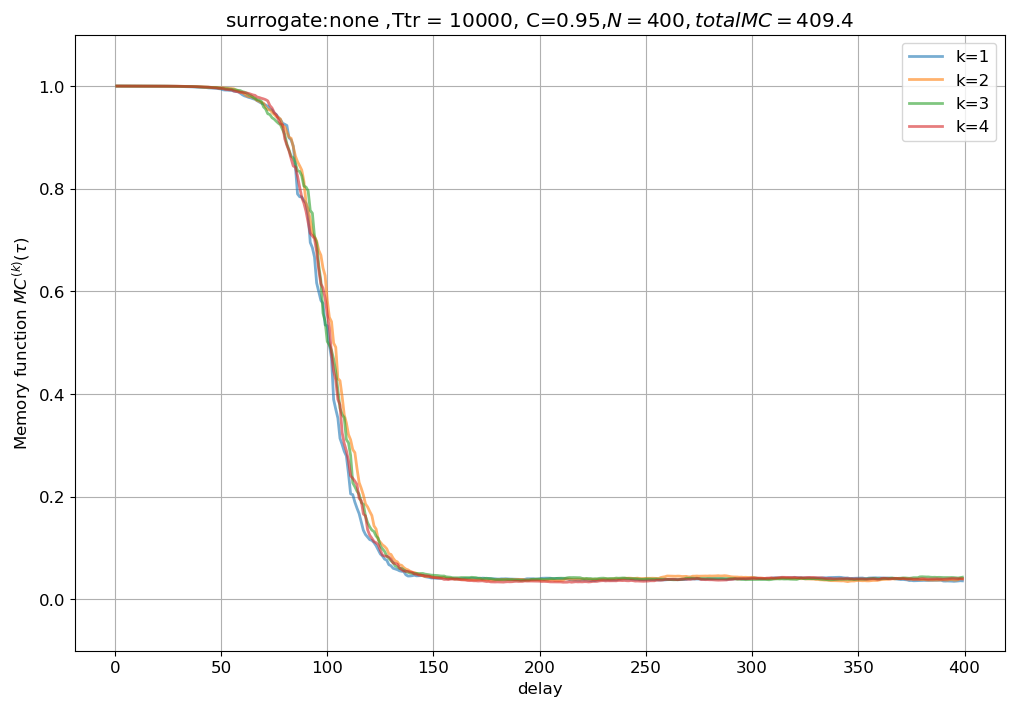

In [16]:
### Raw data plot

fig,ax = plt.subplots(figsize=(12,8))
for d in range(dim):
    #plt.plot(taus,mfs[d].cpu().numpy(),color=colors[d],alpha=0.6,label="dim "+str(d))
    plt.plot(taus,mfs2[d].cpu().numpy(),alpha=0.6,label="k="+str(d+1),linewidth=2)

totMC = torch.sum(mfs2[:,:tau_end]).cpu().numpy()
plt.ylim(-0.1,1.1)
plt.xlabel("delay")
plt.ylabel(r'Memory function $MC^{(k)}(\tau)$')
plt.title(r'surrogate:%s ,Ttr = %d, C=%.2f,$N=%d, totalMC=%.1f$'%("revised",Ttrain,C,N,totMC))
plt.legend()
plt.grid(True)
plt.savefig(f"./experiments/surrogate/rev_{dim}d_{Ttrain}T_{N}N.png")

nan


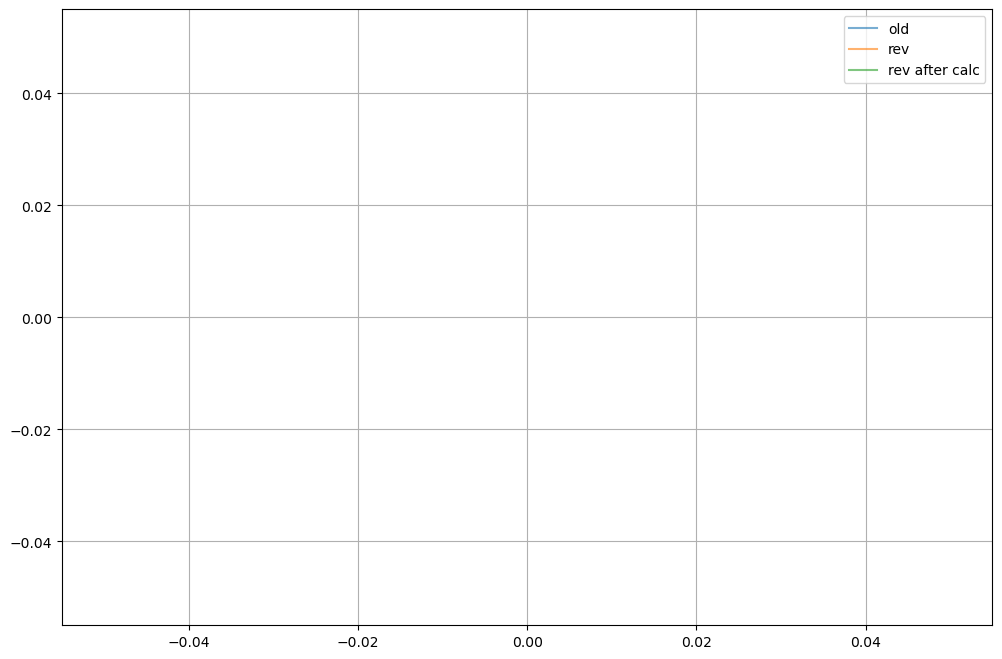

In [2]:
st,end=400,-1

fig,ax = plt.subplots(figsize=(12,8))
plt.plot(taus[st:end],mfs1[0][st:end].cpu().numpy(),alpha=0.6,label="old")
plt.plot(taus[st:end],mfs2[0][st:end].cpu().numpy(),alpha=0.6,label="rev")
plt.plot(taus[st:end],mfs3[0][st:end].cpu().numpy(),alpha=0.6,label="rev after calc")
#plt.plot(taus[st:end],raw_res[0][st:end].cpu().numpy(),alpha=0.6,label="raw")
plt.legend()
plt.grid(True)
print(torch.mean(mfs1[0][st:end]-mfs2[0][st:end]).cpu().numpy())


nan


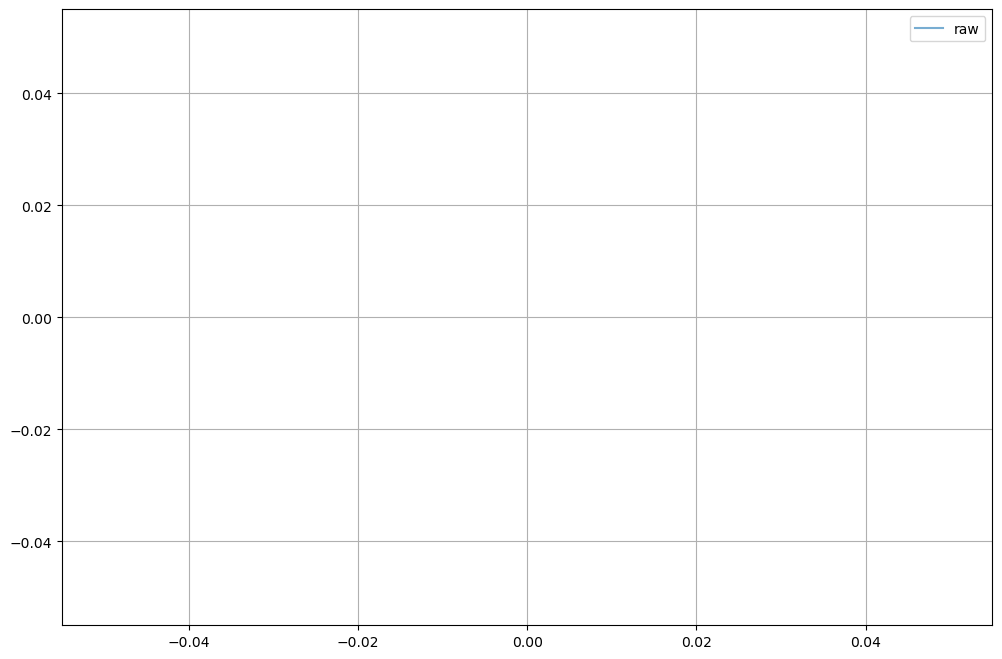

In [3]:
st,end=480,620

fig,ax = plt.subplots(figsize=(12,8))
plt.plot(taus[st:end],raw_res[0][st:end].cpu().numpy(),alpha=0.6,label="raw")
plt.legend()
plt.grid(True)
print(torch.mean(mfs1[0][st:end]-mfs2[0][st:end]).cpu().numpy())


totMC_raw: 375.9897610291937


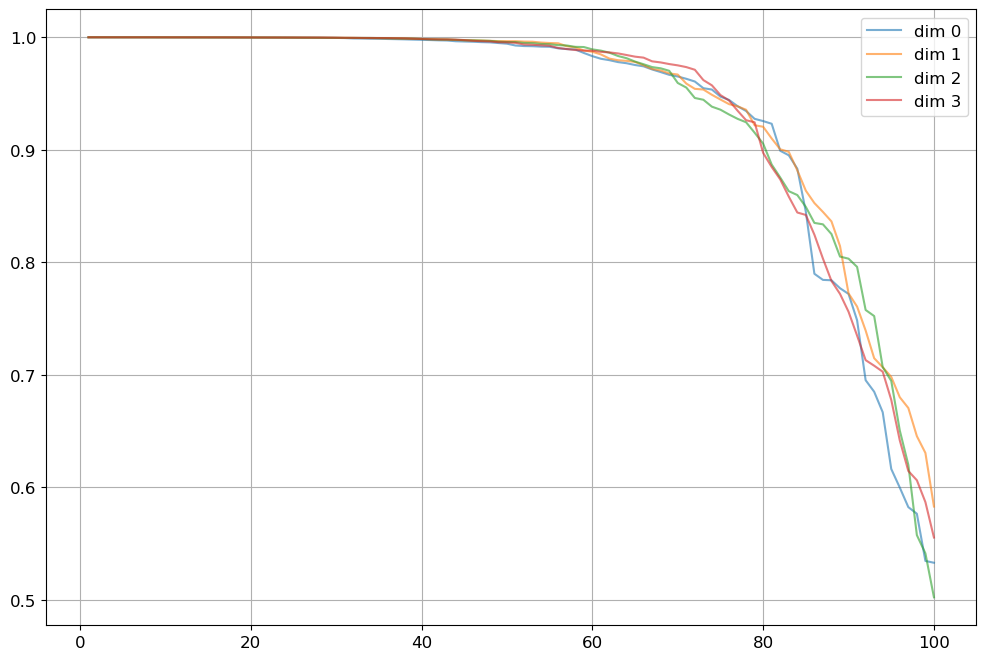

In [23]:
fig,ax = plt.subplots(figsize=(12,8))

tau_end = 100
for d in range(dim):
    plt.plot(taus[:tau_end],raw_res[d][:tau_end].cpu().numpy(),alpha=0.6,label="dim "+str(d))
totrawMC = torch.sum(raw_res[:,:tau_end]).cpu().numpy()
print("totMC_raw:",totrawMC)
#
plt.legend()
plt.grid(True)

NameError: name 'N_d' is not defined

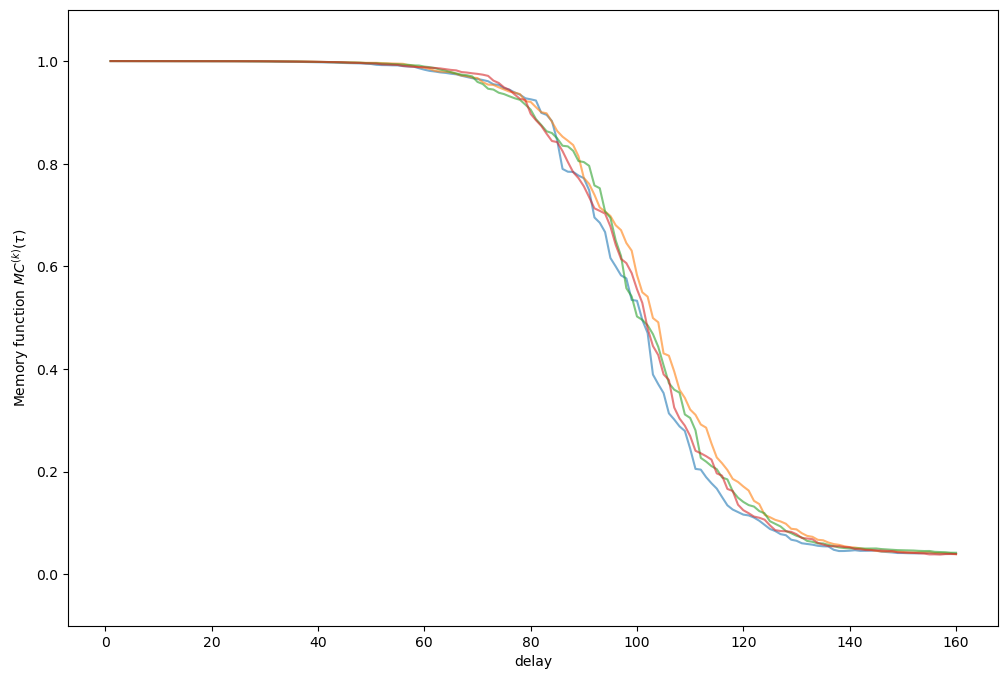

In [5]:
fig,ax = plt.subplots(figsize=(12,8))

tau_end = 160
for d in range(dim):
    plt.plot(taus[:tau_end],raw_res[d][:tau_end].cpu().numpy(),alpha=0.6,label="dim "+str(d))
totrawMC = torch.sum(raw_res[:,:tau_end]).cpu().numpy()
plt.ylim(-0.1,1.1)
plt.xlabel("delay")
plt.ylabel(r'Memory function $MC^{(k)}(\tau)$')
plt.title(r'Ttr = %d, C=%.2f,$N=%d, totalMC=%.1f$'%(Ttrain,C,N_d,totrawMC))
#
plt.legend()
plt.grid(True)

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))

tau_end = 160
for d in range(dim):
    plt.plot(taus[:tau_end],mfs[d][:tau_end].cpu().numpy(),alpha=0.6,label="dim "+str(d))
totMC = torch.sum(mfs[:,:tau_end]).cpu().numpy()
plt.ylim(-0.1,1.1)
plt.xlabel("delay")
plt.ylabel(r'Memory function $MC^{(k)}(\tau)$')
plt.title(r'Ttr = %d, C=%.2f,$N=%d, totalMC=%.1f$'%(Ttrain,C,N_d,totMC))
#
plt.legend()
plt.grid(True)

In [ ]:
""""""
st = time.time()
#mfs = ESN.MCwithPI_general(u_sym, Xwo, maxtau)
#mfs = ESN.MCwithPI_general_with_surrogate(u_sym, Xwo, maxtau,sur_samples=10)
#mfs = ESN.MCwithPI_general_newsur(u_sym, Xwo, maxtau,sur_sets=1)
#mfs = ESN.MC_cSVD_old(u_sym, Xwo, maxtau)
mfs = ESN.MC_cSVD(u_sym, Xwo, maxtau)
print("calc time :",time.time()-st)

totMC = torch.sum(mfs).cpu().numpy()

print(totMC)

taus = np.arange(1,maxtau)
fig,ax = plt.subplots(figsize=(12,8))
for d in range(dim):
    #plt.plot(taus,mfs[d].cpu().numpy(),color=colors[d],alpha=0.6,label="dim "+str(d))
    plt.plot(taus,mfs[d].cpu().numpy(),alpha=0.6,label="dim "+str(d))
    
plt.ylim(-0.1,1.1)
plt.xlabel("delay")
plt.ylabel(r'Memory function $MC^{(k)}(\tau)$')
plt.title(r'Ttr = %d, C=%.2f,$N=%d, totalMC=%.1f$'%(Ttrain,C,N_d,totMC))
plt.legend()
plt.grid(True)


In [ ]:
fig,ax = plt.subplots(figsize=(12,8))

tau_st =200 
for d in range(dim):
    plt.plot(taus[tau_st:],mfs[d][tau_st:].cpu().numpy(),alpha=0.6,label="dim "+str(d))

print(torch.mean(raw_res[:,tau_st:]).cpu().numpy())
print(torch.mean(mfs[:,tau_st:]).cpu().numpy())


plt.xlabel("delay")
plt.ylabel(r'Memory function $MC^{(k)}(\tau)$')
plt.title(r'Ttr = %d, C=%.2f,$N=%d, totalMC=%.1f$'%(Ttrain,C,N_d,totMC))
#
plt.legend()
plt.grid(True)

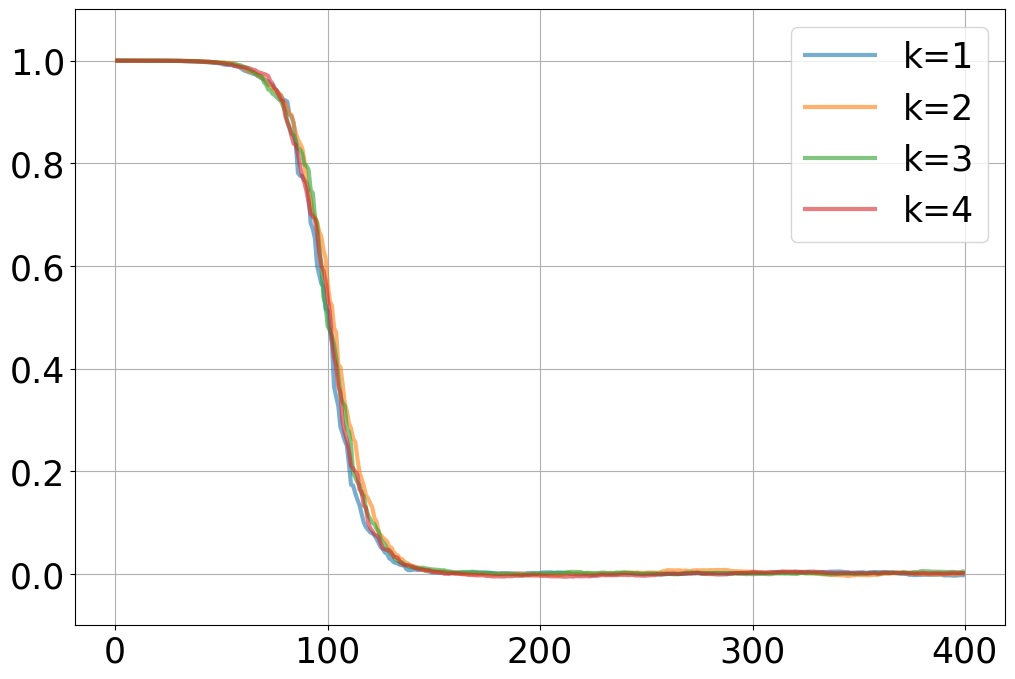

In [7]:
plt.rcParams.update({'font.size': 25})
fig,ax = plt.subplots(figsize=(12,8))

for d in range(dim):
    #plt.plot(taus,mfs[d].cpu().numpy(),color=colors[d],alpha=0.6,label="dim "+str(d))
    plt.plot(taus,mfs1[d].cpu().numpy(),alpha=0.6,label="k="+str(d+1),linewidth=3)

plt.ylim(-0.1,1.1)
#plt.xlabel("delay")
#plt.ylabel(r'Memory function $MC^{(k)}(\tau)$')
#plt.title(r'Ttr = %d, C=%.2f,$N=%d, totalMC=%.1f$'%(Ttrain,C,N_d,totMC))
plt.legend()
plt.grid(True)